In [5]:
from qiskit import QuantumCircuit, Aer, transpile, assemble
from qiskit.visualization import plot_histogram


def add_integers(n):

    qc=QuantumCircuit(2*n+n+1)

    #testing initialization for 2 bits numbers
    qc.initialize([1,0],0)
    qc.initialize([0,1],1)
    qc.initialize([1,0],2)
    qc.initialize([0,1],3)
    qc.initialize([0,1],4)
    qc.initialize([1,0],5)
    qc.initialize([0,1],6)
    qc.initialize([0,1],7)



####creating the adder circuit
    a=list(range(n))
    b=list(range(n))
    b=[j + n for j in b]
    sum_reg=list(range(n+1))
    sum_reg=[j+2*n for j in sum_reg]

    # Add integer addition circuit
    for i in range(n):
        qc.toffoli(a[i], b[i],sum_reg[i+1] )
        qc.cnot(a[i], b[i])
        qc.toffoli(b[i], sum_reg[i],sum_reg[i+1] )
        qc.cnot(b[i], sum_reg[i])
    
# # Measure the result
    qc.measure_all()

    return qc

# Set the number of bits for the integers
n = 4
circuit=add_integers(n)
# Draw the circuit
circuit.draw()




┌─────────────────┐                                                  »
    q_0: ┤ Initialize(1,0) ├──■───────────────────■───────────────────────────»
         ├─────────────────┤  │                   │                           »
    q_1: ┤ Initialize(0,1) ├──┼────■──────────────┼────■──────────────────────»
         ├─────────────────┤  │    │              │    │                      »
    q_2: ┤ Initialize(1,0) ├──┼────┼────■─────────┼────┼────■─────────────────»
         ├─────────────────┤  │    │    │         │    │    │                 »
    q_3: ┤ Initialize(0,1) ├──┼────┼────┼────■────┼────┼────┼────■────────────»
         ├─────────────────┤  │    │    │    │  ┌─┴─┐  │    │    │            »
    q_4: ┤ Initialize(0,1) ├──■────┼────┼────┼──┤ X ├──┼────┼────┼────■────■──»
         ├─────────────────┤  │    │    │    │  └───┘┌─┴─┐  │    │    │    │  »
    q_5: ┤ Initialize(1,0) ├──┼────■────┼────┼───────┤ X ├──┼────┼────┼────┼──»
         ├─────────────────┤  │    │    │    │       └───┘┌─┴─┐  │    │    │  »
    q_6: ┤ Initialize(0,1) ├──┼────┼────■────┼────────────┤ X ├──┼────┼────┼──»
         ├─────────────────┤  │    │    │    │            └───┘┌─┴─┐  │    │  »
    q_7: ┤ Initialize(0,1) ├──┼────┼────┼────■─────────────────┤ X ├──┼────┼──»
         └─────────────────┘  │    │    │    │                 └───┘  │  ┌─┴─┐»
    q_8: ─────────────────────┼────┼────┼────┼────────────────────────■──┤ X ├»
                            ┌─┴─┐  │    │    │                      ┌─┴─┐└───┘»
    q_9: ───────────────────┤ X ├──┼────┼────┼──────────────────────┤ X ├─────»
                            └───┘┌─┴─┐  │    │                      └───┘     »
   q_10: ────────────────────────┤ X ├──┼────┼────────────────────────────────»
                                 └───┘┌─┴─┐  │                                »
   q_11: ─────────────────────────────┤ X ├──┼────────────────────────────────»
                                      └───┘┌─┴─┐                              »
   q_12: ──────────────────────────────────┤ X ├──────────────────────────────»
                                           └───┘                              »
meas: 13/═════════════════════════════════════════════════════════════════════»
                                                                              »
«                                        ░ ┌─┐                                 »
«    q_0: ───────────────────────────────░─┤M├─────────────────────────────────»
«                                        ░ └╥┘┌─┐                              »
«    q_1: ───────────────────────────────░──╫─┤M├──────────────────────────────»
«                                        ░  ║ └╥┘┌─┐                           »
«    q_2: ───────────────────────────────░──╫──╫─┤M├───────────────────────────»
«                                        ░  ║  ║ └╥┘┌─┐                        »
«    q_3: ───────────────────────────────░──╫──╫──╫─┤M├────────────────────────»
«                                        ░  ║  ║  ║ └╥┘┌─┐                     »
«    q_4: ───────────────────────────────░──╫──╫──╫──╫─┤M├─────────────────────»
«                                        ░  ║  ║  ║  ║ └╥┘┌─┐                  »
«    q_5: ──■────■───────────────────────░──╫──╫──╫──╫──╫─┤M├──────────────────»
«           │    │                       ░  ║  ║  ║  ║  ║ └╥┘┌─┐               »
«    q_6: ──┼────┼────■────■─────────────░──╫──╫──╫──╫──╫──╫─┤M├───────────────»
«           │    │    │    │             ░  ║  ║  ║  ║  ║  ║ └╥┘┌─┐            »
«    q_7: ──┼────┼────┼────┼────■────■───░──╫──╫──╫──╫──╫──╫──╫─┤M├────────────»
«           │    │    │    │    │    │   ░  ║  ║  ║  ║  ║  ║  ║ └╥┘┌─┐         »
«    q_8: ──┼────┼────┼────┼────┼────┼───░──╫──╫──╫──╫──╫──╫──╫──╫─┤M├─────────»
«           │  ┌─┴─┐  │    │    │    │   ░  ║  ║  ║  ║  ║  ║  ║  ║ └╥┘┌─┐      »
«    q_9: ──■──┤ X ├──┼────┼────┼────┼───░──╫──╫──╫──╫──╫──╫──╫──╫──╫─┤M├──────»
«         ┌─┴─┐└───┘  │  ┌─┴─┐  │    │   ░  ║  ║  ║  ║  ║  ║  ║  ║  ║

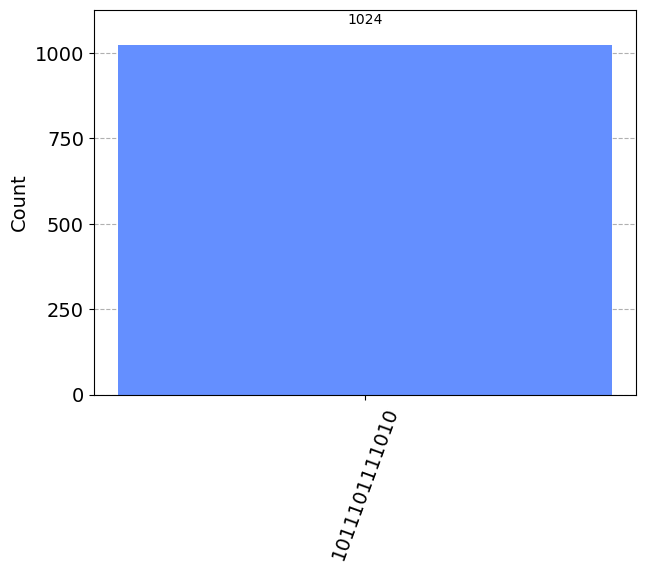

In [7]:
from qiskit_aer import AerSimulator
from qiskit.tools.visualization import plot_histogram
# Simulate the circuit

sim_ideal = AerSimulator()
result_ideal = sim_ideal.run(circuit).result()
plot_histogram(result_ideal.get_counts(0))

so, the first three bits are the output, the last four are the inputs, where the first is a and the seccond is be for a+b = output. note that this is for two bit addition. thank you!